### Figure 5
Reproducing Figure 5, showing the out-of-time-ordered-correlator for two different initial values on the left, and showing the out-of-time ordered correlator for a range of values of $N$ on the right.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Loading the data
The data for reproducing the left panel of figure 5, can be found in `/data/otoc_data/fig5/fig5_left`, this contains two files: `fig5_leftX.csv` and `fig5_leftY.csv`. These include data for the OTOC calculated on a system of $1000$ qubits over $250$ individual realisations, with $V(0) = T_3 C3$ and $W(0)$ of the form:


 $$
D_1 XX...X
 $$

 Where $D_1 = X$ for the data in `/data/otoc_data/fig5/fig5_left/fig5_leftX.csv` and $D_1 = Y$ for the data in `/data/otoc_data/fig5/fig5_left/fig5_leftY.csv`.

 The data for reproducing the right panel of Figure 5 can be found in `/data/otoc_data/fig5/fig5_right`, this contains 5 different `.npz`files labelled by system-size and each of these contains the data for the out-of-time-ordered correlator calculated for $N = 180, 240, 300, 360, 420$, each of which was calculated and averaged over $50$ realisations. In all cases the operator $V(0) = C3$ and $W(0) = XXX...X$.

In [2]:
dir = os.getcwd() + "/data/otoc_data/fig5/fig5_right/"
otoc_results = {}
for file in os.listdir(dir):
    if file.endswith(".npz"):
        N = int(file.split(".")[0][1:])
        data = np.load(dir + file)
        for arr in data:
            otoc_results[N] = data[arr]

fig5_leftX = pd.read_csv("data/otoc_data/fig5/fig5_left/fig5_leftX.csv").mean(
    axis=0
)
fig5_leftY = pd.read_csv("data/otoc_data/fig5/fig5_left/fig5_leftY.csv").mean(
    axis=0
)

#### Reproducing the plots
Plotting the left panel:

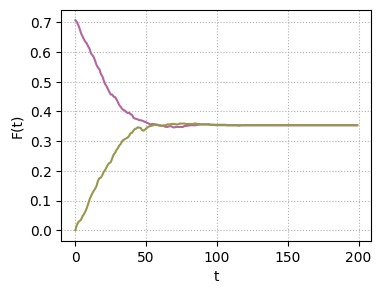

In [3]:
ts = np.arange(0, 200, 1)

plt.figure(
    figsize=(4, 3)
)  # left: 0.133, bottom: 0.155 - need to fix these to make sure labels show.
plt.plot(ts, fig5_leftX, color="#b3669e")
plt.plot(ts, fig5_leftY, color="#98984d")
plt.xlabel("t")
plt.ylabel("F(t)")
plt.grid(linestyle="dotted")
plt.show()

Plotting the right panel:

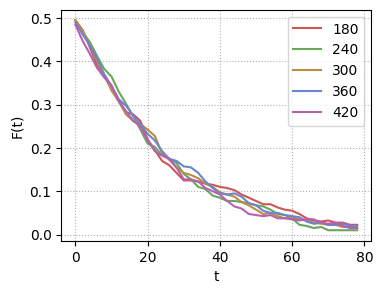

In [4]:
colors = ["#cc5658", "#69a75b", "#bc8d3d", "#6885d0", "#b75fb3"]

plt.figure(figsize=(4, 3))
for i, key in enumerate(sorted(otoc_results.keys())):
    plt.plot(range(0, 80, 2), otoc_results[key], label=key, color=colors[i])
plt.xlabel("t")
plt.ylabel("F(t)")
plt.legend()
plt.grid(linestyle="dotted")
plt.show()